In [1]:
import pandas as pd
import prophet as Prophet
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


In [3]:
letran_electronics = pd.read_csv('CSV/board-exam-results - LETRAN-Electronics.csv')

letran_electronics['Year'] = letran_electronics['Time Date'].apply(lambda x: str(x)[-4:])
letran_electronics['Month'] = letran_electronics['Time Date'].apply(lambda x: str(x)[-6:-4])
letran_electronics['Day'] = letran_electronics['Time Date'].apply(lambda x: str(x)[:-6])
letran_electronics['ds'] = pd.DatetimeIndex(letran_electronics['Year']+'-'+letran_electronics['Month']+'-'+letran_electronics['Day'])

letran_electronics.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
letran_electronics.columns = ['y', 'ds']

m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
letran_electronics_model = m.fit(letran_electronics)

# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 4, 28), datetime(2023, 10, 4), datetime(2024, 4, 28), datetime(2024, 10, 4), datetime(2025, 4, 28), datetime(2025, 10, 4), datetime(2026, 4, 28), datetime(2026, 10, 4), datetime(2027, 4, 28), datetime(2027, 10, 4), datetime(2028, 4, 28), datetime(2028, 10, 4), datetime(2029, 4, 28), datetime(2029, 10, 4), datetime(2030, 4, 28), datetime(2030, 10, 4)]


# Create a dataframe with those specific dates
letran_electronics_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
letran_electronics_forecast = m.predict(letran_electronics_future)
letran_electronics_forecast['yhat'] = letran_electronics_forecast['yhat'].clip(lower=0, upper=100).round()

23:04:04 - cmdstanpy - INFO - Chain [1] start processing
23:04:05 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
letran_electronics_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-04-28,49.0
1,2023-10-04,6.0
2,2024-04-28,31.0
3,2024-10-04,2.0
4,2025-04-28,42.0
5,2025-10-04,7.0
6,2026-04-28,52.0
7,2026-10-04,12.0
8,2027-04-28,61.0
9,2027-10-04,18.0


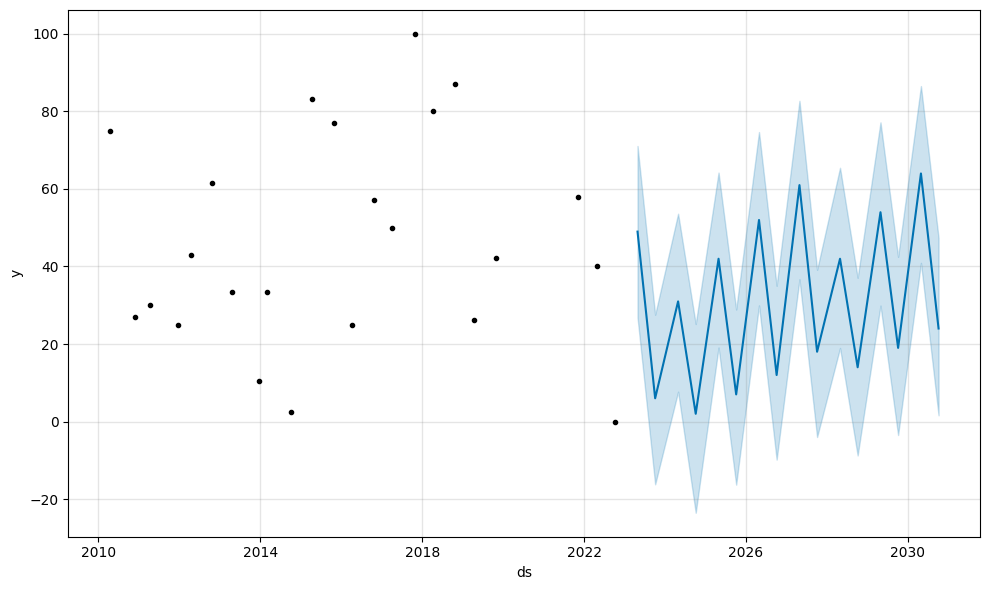

In [5]:
letran_electronics_plot = m.plot(letran_electronics_forecast)

In [6]:
perps_electronics = pd.read_csv('CSV/board-exam-results - PERP-Electronics.csv')

perps_electronics['Year'] = perps_electronics['Time Date'].apply(lambda x: str(x)[-4:])
perps_electronics['Month'] = perps_electronics['Time Date'].apply(lambda x: str(x)[-6:-4])
perps_electronics['Day'] = perps_electronics['Time Date'].apply(lambda x: str(x)[:-6])
perps_electronics['ds'] = pd.DatetimeIndex(perps_electronics['Year']+'-'+perps_electronics['Month']+'-'+perps_electronics['Day'])

perps_electronics.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
perps_electronics.columns = ['y', 'ds']

m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
perps_electronics_model = m.fit(perps_electronics)

# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 4, 28), datetime(2023, 10, 4), datetime(2024, 4, 28), datetime(2024, 10, 4), datetime(2025, 4, 28), datetime(2025, 10, 4), datetime(2026, 4, 28), datetime(2026, 10, 4), datetime(2027, 4, 28), datetime(2027, 10, 4), datetime(2028, 4, 28), datetime(2028, 10, 4), datetime(2029, 4, 28), datetime(2029, 10, 4), datetime(2030, 4, 28), datetime(2030, 10, 4)]

# Create a dataframe with those specific dates
perps_electronics_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
perps_electronics_forecast = m.predict(perps_electronics_future)
perps_electronics_forecast['yhat'] = perps_electronics_forecast['yhat'].clip(lower=0, upper=100).round()

23:07:51 - cmdstanpy - INFO - Chain [1] start processing
23:07:51 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
perps_electronics_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-04-28,8.0
1,2023-10-04,8.0
2,2024-04-28,0.0
3,2024-10-04,0.0
4,2025-04-28,2.0
5,2025-10-04,3.0
6,2026-04-28,12.0
7,2026-10-04,11.0
8,2027-04-28,21.0
9,2027-10-04,20.0


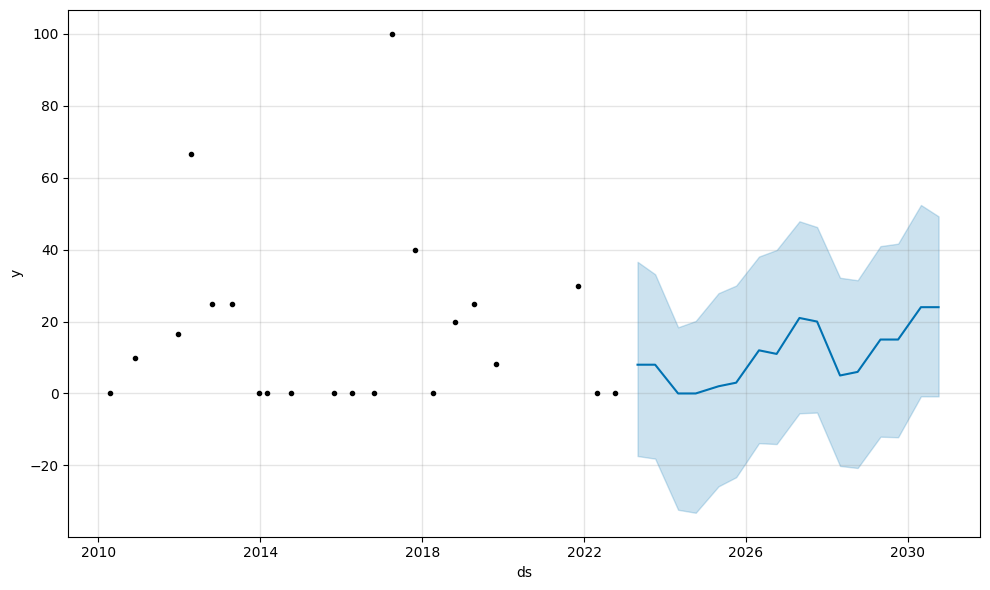

In [8]:
perps_electronics_plot = m.plot(perps_electronics_forecast)